In [ ]:
# Create training set with chapters of Kafka's "The Trial" and "The Castle"

#First: 

#Instructions: write a first chapter of ... (With how long it should be)
# Output chapter: 

#Second:
# Tell me what happend in the chapter


#third 
# What part is missing 


#Four: 
# This happend .... write the next chapter for this part. 

In [14]:
# read all txt.files and count words

import os
import re

chapters = {}
datapath = "resources/novels/the_trial"
for filename in os.listdir(datapath):
    if filename != "the_trial_notes.txt":
        with open(os.path.join(datapath, filename), "r") as file:
            text = file.read()
            chapters[filename] = text

words_count = {}
for filename, text in chapters.items(): 
    # count words
    words = re.findall(r'\w+', text)
    words_count[filename] = len(words)

words_count

{'the_trial_10_the_end.txt': 1926,
 'the_trial_4_empty_courtroom.txt': 8813,
 'the_trial_5_the_flogger.txt': 2425,
 'the_trial_8_dismissal.txt': 11038,
 'the_trial_1_arrest.txt': 5446,
 'the_trial_6_unlce.txt': 7671,
 'the_trial_3_initial_inquiry.txt': 5732,
 'the_trial_2_conversation.txt': 4698,
 'the_trial_9_cathedral.txt': 8582,
 'the_trial_7_law_man_paint.txt': 18297}

Matplotlib is building the font cache; this may take a moment.


{'whiskers': [<matplotlib.lines.Line2D at 0x118bacc90>,
 'caps': [<matplotlib.lines.Line2D at 0x118bae350>,
 'boxes': [<matplotlib.lines.Line2D at 0x118ba3a10>],
 'medians': [<matplotlib.lines.Line2D at 0x118bafb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x118bbcc50>],
 'means': []}

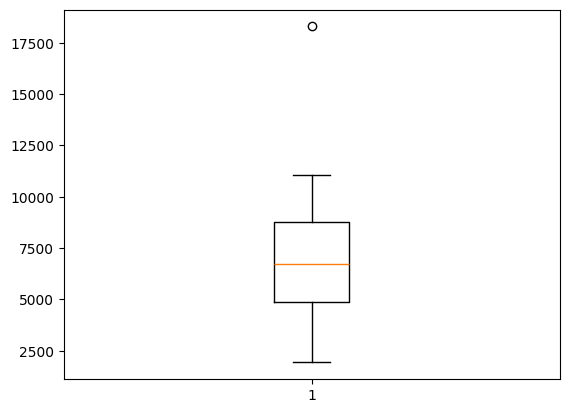

In [7]:
# Draw a boxplot over a words_count dictionary 

import matplotlib.pyplot as plt
plt.boxplot(words_count.values())

(array([2., 3., 1., 2., 1., 0., 0., 1.]),
 array([ 1926.   ,  3972.375,  6018.75 ,  8065.125, 10111.5  , 12157.875,
        14204.25 , 16250.625, 18297.   ]),
 <BarContainer object of 8 artists>)

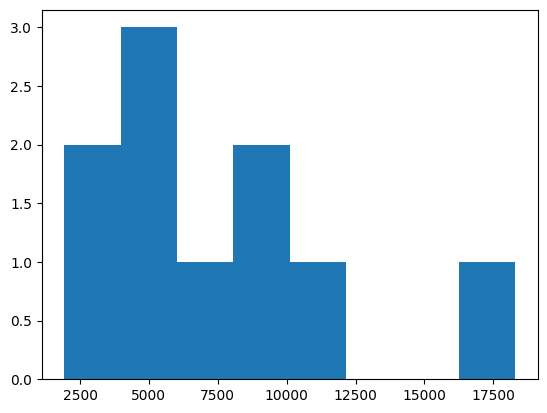

In [13]:
# Draw a histogram over a words_count dictionary

plt.hist(words_count.values(), bins=8)

# Let then say we want something between 5000 and 7500 words

In [ ]:
# create a training set for LLM using kafka's "The Trail" chapters 

prompt_1 = "Generate a {x} chapter of Kafka's 'The Trial'" 
system_1 = "Output should have from {x} to {y} words" 

prompt = "What is the first chapter of Kafka's The Trial about?"

prompt = |"Write the chapter of Kafka's novel between X and Y. Chpater X ends with... and chapter Y starts with..."''

prompt = "Write the next chapter of Kafka's 'The Trial' after the ending of previous chapter and begining of the next that goes... " 

prompt = "what happens the chater before the missing part "

prompt = "what happens the chapter after the missing part "

START_HEADER = '<|start_header_id|>'
END_HEADER = '<|end_header_id|>'
END_OF_TEXT = '<|eot_id|>'
SYSTEM = 'system'
PROMPT = 'user'
OUTPUT = 'assistant'

In [ ]:
#example text for training 
# <|start_header_id|>system<|end_header_id|> Answer the question truthfully, you are a medical professional.<|eot_id|><|start_header_id|>user<|end_header_id|> This is the question: What does "Clear: cell" mean?<|eot_id|><|start_header_id|>assistant<|end_header_id|> Clear cell tumors are part of the surface epithelial-stromal tumor group of Ovarian cancers, accounting for 6% of these neoplastic cases. Clear cell tumors are also associated with the pancreas and salivary glands. Benign and borderline variants of this neoplasm are rare, and most cases are malignant. Typically, they are cystic neoplasms with polypoid masses that protrude into the cyst. On microscopic pathological examination, they are composed of cells with clear cytoplasm (that contains glycogen) and hob nail cells (from which the glycogen has been secreted). The pattern may be glandular, papillary or solid.<|eot_id|>

In [18]:
chapter_numerals = ['1st', '2nd', '3rd'] + [str(x)+'th' for x in range(4, 11)]

['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']

In [34]:


def get_file_chapter_number(filename): 
    return int(filename.split('_')[2].split('.')[0])

#transform chapters dict to have numbers as keys
transformed_chapter_dict = {get_file_chapter_number(key): value for key, value in chapters.items()}
transformed_chapter_dict


{10: "The end \nOn the eve of his thirty-first birthday—it was around nine in the evening, when the streets are quiet—two gentlemen entered K.'s lodgings. In frock coats, pale and fat, with top hats that seemed immovable. After brief formalities at the outer door over who would enter first, the same formalities were repeated more elaborately before K.'s door. Without having been informed of their visit, K., also dressed in black, was sitting in an armchair near the door, slowly pulling on new gloves that stretched tightly over his fingers, with the look of someone expecting guests. He stood up immediately and regarded the gentlemen curiously. “So you are meant for me?” he asked. The gentlemen nodded, each pointing with the top hat in his hand toward the other. K. admitted to himself that he had been expecting different visitors. He went to the window and looked out again into the dark street. Almost all the windows across the way were still dark, in many the curtains had been lowered. 

### CREATING TRAINING DICT 1 

In [16]:
chapter_numerals = ['1st', '2nd', '3rd'] + [str(x)+'th' for x in range(4, 11)]
sorted_chapters = dict(sorted({
    get_file_chapter_number(key): value for key, value in chapters.items()
    }.items()))
training_dict_1 = {}

for numeral, chapter in zip(chapter_numerals, sorted_chapters.values()): 
    training_dict_1[numeral] = chapter
    


[4, 5, 6, 7, 8, 9, 10]

{1: "Arrest\nSomeone must have slandered Josef K., for one morning, without having done anything truly wrong, he was arrested. His landlady, Frau Grubach, had a cook who brought him breakfast each day around eight, but this time she didn't appear. That had never happened before. K. waited a while longer, watching from his pillow the old woman who lived across the way, who was peering at him with a curiosity quite unusual for her; then, both put out and hungry, he rang. There was an immediate knock at the door and a man he'd never seen before in these lodgings entered. He was slender yet solidly built, and was wearing a fitted black jacket, which, like a traveler's outfit, was provided with a variety of pleats, pockets, buckles, buttons and a belt, and thus appeared eminently practical, although its purpose remained obscure. “Who are you?” asked K., and immediately sat halfway up in bed. But the man ignored the question, as if his presence would have to be accepted, and merely said in t